In [9]:
import sys
sys.path.append("..")
import os
import matplotlib.pyplot as plt

In [10]:
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
    "axes.labelsize": 18,
    "axes.titlesize": 20,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}",
})

In [2]:
%load_ext autoreload
%autoreload 2
from benchmarks.evaluator.oneshot import Evaluator
from benchmarks.evaluator.utils import plot_success_bars
from benchmarks.prompts.camb import get_prompts

In [3]:
df = get_prompts(reintial=False)

In [4]:
workdir = "/Users/antoidicherianlonappan/Workspace/cmbagent_output/evals"

In [5]:
Ee4o = Evaluator(workdir,agent='engineer', model='gpt-4o', trials=10)
Ee41 = Evaluator(workdir,agent='engineer', model='gpt-4.1', trials=10)
Ecc = Evaluator(workdir,agent='camb_context', model='', trials=10)

In [6]:
Ee4o(df)
Ee41(df)
Ecc(df)

creating reference answers for prompts: 100%|██████████| 14/14 [00:00<00:00, 28002.03it/s]


In [7]:
#results = E.run_all()

/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:228: FutureWarning: The 'special_case=True' option will be removed in a future version.
  result = self.success_prompt(idx, special_case=special_case)


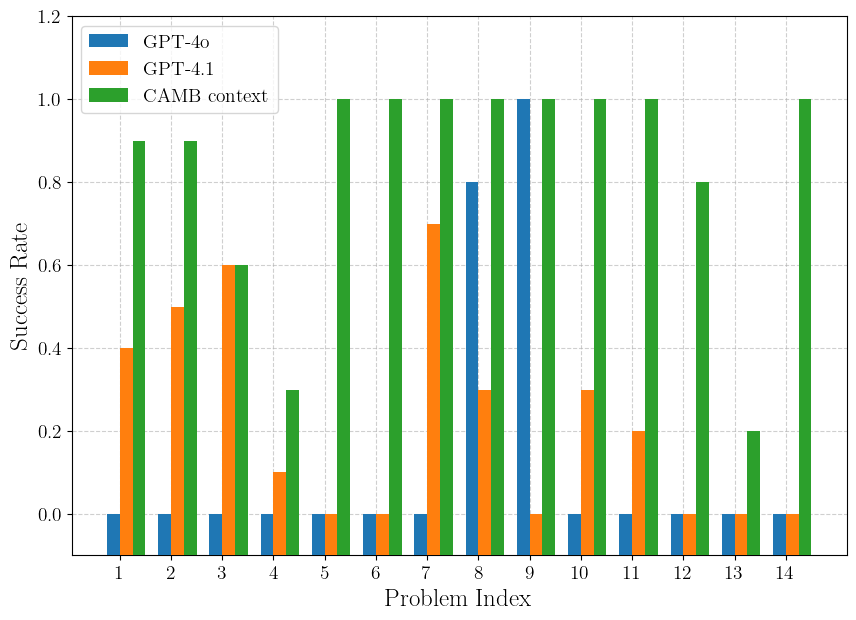

In [28]:
scores = [Ee4o.success_all(), Ee41.success_all(), Ecc.success_all()]
plot_success_bars(scores, ['GPT-4o', 'GPT-4.1', 'CAMB context'],width=0.25,save='camb_success.pdf')